Данные с хакатона - https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
pd.set_option('display.max_columns', None)
data_train = pd.read_excel('data/Data_Train.xlsx')
data_test = pd.read_excel('data/Test_set.xlsx')
data_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
price_train = data_train['Price']
data = pd.concat([data_train.drop(['Price'], axis=1), data_test])
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null object
Source             13354 non-null object
Destination        13354 non-null object
Route              13353 non-null object
Dep_Time           13354 non-null object
Arrival_Time       13354 non-null object
Duration           13354 non-null object
Total_Stops        13353 non-null object
Additional_Info    13354 non-null object
dtypes: object(10)
memory usage: 1.1+ MB


In [5]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64

In [7]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

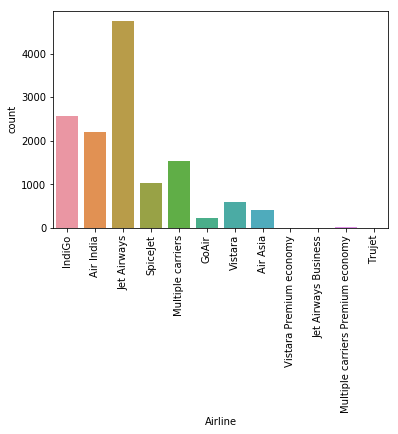

In [8]:
sns.countplot(x='Airline', data=data)
plt.xticks(rotation=90)

In [9]:
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

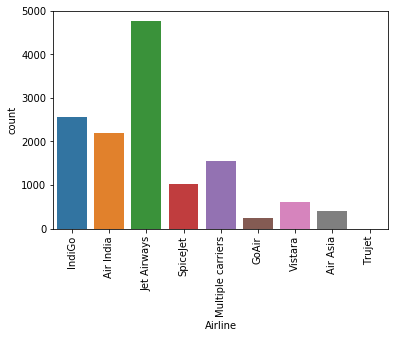

In [10]:
sns.countplot(x='Airline', data=data)
plt.xticks(rotation=90)

In [11]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [12]:
data['Destination'] = np.where(data['Destination']=='Delhi','New Delhi', data['Destination'])

In [13]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

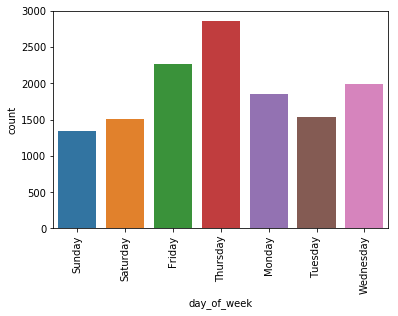

In [14]:
data['day_of_week'] = data['Date_of_Journey'].dt.day_name()

sns.countplot(x='day_of_week', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

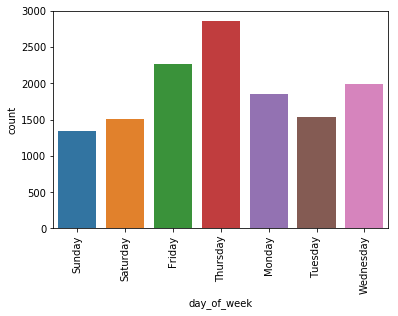

In [15]:
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month_name()

sns.countplot(x='day_of_week', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

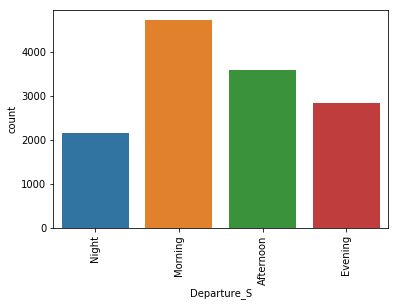

In [16]:
data['Departure_t'] = pd.to_datetime(data.Dep_Time, format='%H:%M')
a = data.assign(dept_session=pd.cut(data.Departure_t.dt.hour,
                                    [0,6,12,18,24],
                                    labels=['Night','Morning','Afternoon','Evening']))
data['Departure_S'] = a['dept_session']

sns.countplot(x='Departure_S', data=data)
plt.xticks(rotation=90)

In [17]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week,Journey_Month,Departure_t,Departure_S
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,Sunday,March,1900-01-01 22:20:00,Evening
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,Saturday,January,1900-01-01 05:50:00,Night
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,Friday,September,1900-01-01 09:25:00,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,Thursday,December,1900-01-01 18:05:00,Afternoon
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,Thursday,January,1900-01-01 16:50:00,Afternoon


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null datetime64[ns]
Source             13354 non-null object
Destination        13354 non-null object
Route              13353 non-null object
Dep_Time           13354 non-null object
Arrival_Time       13354 non-null object
Duration           13354 non-null object
Total_Stops        13353 non-null object
Additional_Info    13354 non-null object
day_of_week        13354 non-null object
Journey_Month      13354 non-null object
Departure_t        13354 non-null datetime64[ns]
Departure_S        13303 non-null category
dtypes: category(1), datetime64[ns](2), object(11)
memory usage: 1.8+ MB


In [21]:
data[data['Departure_S'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week,Journey_Month,Departure_t,Departure_S
161,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,Sunday,March,1900-01-01 00:40:00,NaN
210,IndiGo,2019-12-05,Banglore,New Delhi,BLR → DEL,00:30,03:25,2h 55m,non-stop,No info,Thursday,December,1900-01-01 00:30:00,NaN
855,IndiGo,2019-06-06,Banglore,New Delhi,BLR → DEL,00:25,03:15,2h 50m,non-stop,No info,Thursday,June,1900-01-01 00:25:00,NaN
860,IndiGo,2019-03-03,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,Sunday,March,1900-01-01 00:40:00,NaN
980,Air India,2019-12-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,08:45,8h 15m,1 stop,No info,Tuesday,December,1900-01-01 00:30:00,NaN
1806,Multiple carriers,2019-09-03,Delhi,Cochin,DEL → BOM → COK,00:20,07:40,7h 20m,1 stop,In-flight meal not included,Tuesday,September,1900-01-01 00:20:00,NaN
2079,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,20:30,20h,1 stop,1 Long layover,Thursday,January,1900-01-01 00:30:00,NaN
2275,Air India,2019-03-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,08:45,8h 15m,1 stop,No info,Sunday,March,1900-01-01 00:30:00,NaN
2481,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,23:55,23h 25m,1 stop,1 Long layover,Thursday,January,1900-01-01 00:30:00,NaN
2605,IndiGo,2019-06-21,Banglore,New Delhi,BLR → DEL,00:25,03:15,2h 50m,non-stop,No info,Friday,June,1900-01-01 00:25:00,NaN


In [22]:
data['Departure_S'].fillna("Night", inplace = True)

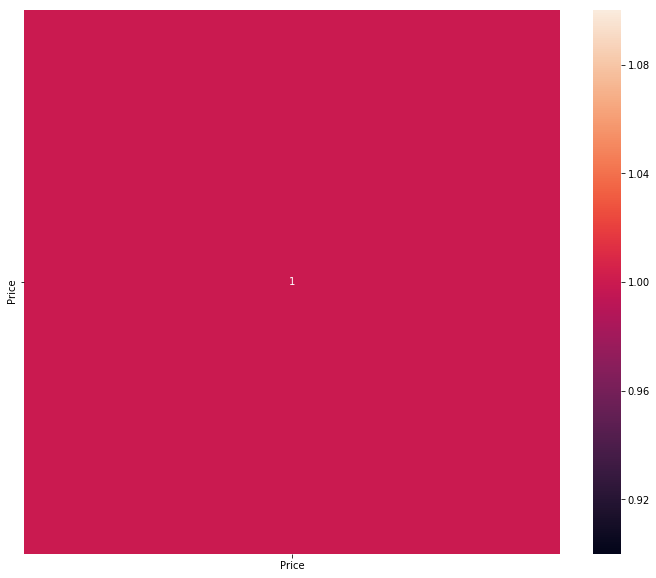

In [23]:
correlation_matrix = data_train.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)